C:\Anaconda\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time: 23.61s
class: person, score: 87.6%
class: horse, score: 99.4%
class: horse, score: 98.7%



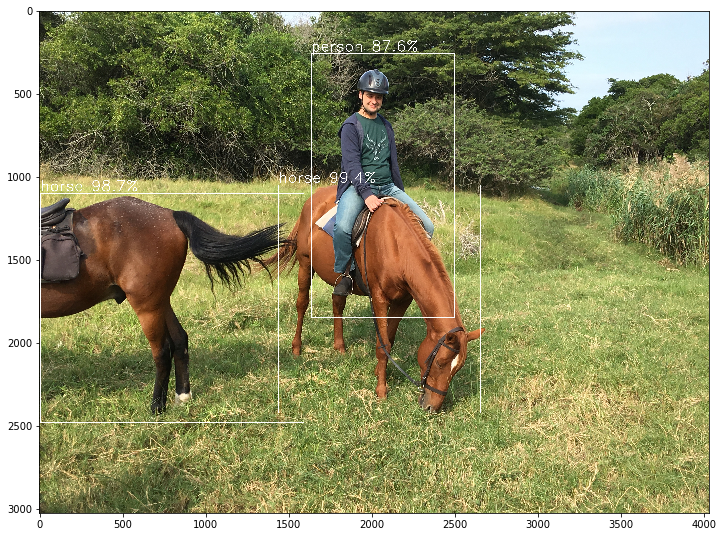

In [3]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from required_files.yolo_model import YOLO
%matplotlib inline


#yolo bu sekilde numpy array ile calistigi icin resmi degistiriyoruz
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image


#daha sonra coco_classes.txt dosyasindaki class isimlerini almak icin kullanacagimiz fonksiyon
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names


#tespit edilen nesnelerin etrafina kare cizmek icin
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box
        
        #fotonun buyuklugune gore yazı boyutunun degismesi icin
        size = image.shape[0]
        font_size = round(size/1000,1)
        font_thickness = int(round(font_size*1.5,0))
        if font_thickness == 0: font_thickness=1
        else: 0
        line_thickness = font_thickness

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 255, 255), line_thickness)
        cv2.putText(image, '{0} {1:.1%}'.format(all_classes[cl], score),
                    (top, left - 15),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    font_size, (255, 255, 255), font_thickness,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.1%}'.format(all_classes[cl], score))
        #print('box coordinate x,y,w,h: {0}'.format(box))

    print()


#yolo detect fonksiyonu    
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image


#yolo ayarlari
yolo = YOLO(0.2, 0.5) #ilk deger ile oynayarak kabul edecegimiz alt limiti belirliyoruz

#class isimleri icin kullanilan text dosyasi, farkli dosya ve agirlik kullanilabilir
#turkce icin
#file = 'required_files/coco_classes_turkish.txt' 
#ingilizce icin
file = 'required_files/coco_classes.txt' 
all_classes = get_classes(file) 

#resim dosyasinin yeri ve ismi
image_name = '1.jpg' 

#resim dosyasinin okunmasi
image = cv2.imread(image_name) 

#yukaridaki ayarlar ile yolonun dosyayi okumasi
image = detect_image(image, yolo, all_classes)

#sonucun disari yazilmasi
cv2.imwrite('result_' + image_name, image)

#tespit edilenlerin gosterimi
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(image)
